In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
# import set_matplotlib_hangul
# %matplotlib inline

import tensorflow as tf
import os
import PIL
import shutil
import cv2
import random
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 기본 경로
base_dir = '/content/drive/MyDrive/project_data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test') 
filepath1 = '/content/drive/MyDrive/20230516_150629.mp4'
filepath2 = '/content/drive/MyDrive/normal_1.mp4'
filepath3 = '/content/drive/MyDrive/normal_2.mp4'
filepath4 = '/content/drive/MyDrive/KakaoTalk_20230519_185951509.mp4'
filepath5 = '/content/drive/MyDrive/KakaoTalk_20230519_190041923.mp4'
filepath6 = '/content/drive/MyDrive/KakaoTalk_20230519_190049929.mp4'
filepath7 = '/content/drive/MyDrive/KakaoTalk_20230519_190100222.mp4'

video1 = cv2.VideoCapture(filepath1) 
video2 = cv2.VideoCapture(filepath2)
video3 = cv2.VideoCapture(filepath3)  
video4 = cv2.VideoCapture(filepath4)
video5 = cv2.VideoCapture(filepath5)
video6 = cv2.VideoCapture(filepath6)
video7 = cv2.VideoCapture(filepath7)

In [4]:
# 훈련용 이미지 경로
train_normal_dir = os.path.join(train_dir, 'normal')
train_mbd_dir = os.path.join(train_dir, 'MBD')
print(train_mbd_dir)
print(train_mbd_dir, train_normal_dir)

/content/drive/MyDrive/project_data/train/MBD
/content/drive/MyDrive/project_data/train/MBD /content/drive/MyDrive/project_data/train/normal


In [5]:
if os.path.exists(train_mbd_dir):
    print("Train MBD directory exists.")
else:
    print("Train MBD directory does not exist.")

Train MBD directory exists.


In [6]:
# 검증용 이미지 경로
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_mbd_dir = os.path.join(validation_dir, 'MBD')
print(validation_mbd_dir, validation_normal_dir)

/content/drive/MyDrive/project_data/validation/MBD /content/drive/MyDrive/project_data/validation/normal


In [7]:
# 테스트용 이미지 경로
test_normal_dir = os.path.join(test_dir, 'normal')
test_mbd_dir = os.path.join(test_dir, 'MBD')
print(test_mbd_dir, test_normal_dir)

/content/drive/MyDrive/project_data/test/MBD /content/drive/MyDrive/project_data/test/normal


In [8]:
# 훈련용 이미지 파일 이름 조회
train_mbd_fnames =os.listdir(train_mbd_dir)
train_normal_fnames = os.listdir(train_normal_dir)
print(train_mbd_fnames)
print(train_normal_fnames)

['mbd59.jpg', 'mbd18.jpg', 'mbd73.jpg', 'mbd69.webp', 'mbd68.jpg', 'mbd29 (1).webp', 'mbd39 (1).webp', 'mbd53.jpg', 'mbd76.jpg', 'mbd74.jpg', 'mbd39.webp', 'mbd81.jpg', 'mbd83.jpg', 'mbd56.jpg', 'mbd57.jpg', 'mbd29.webp', 'mbd60.jpg', 'mbd17.jpg', 'mbd64.webp', 'mbd63.webp', 'mbd67.jpg', 'mbd80.jpg', 'mbd38 (1).jpg', 'KakaoTalk_20230506_154318126_20.jpg', 'mbd78.jpg', 'mbd51.jpg', 'mbd16.jpg', 'mbd47 (1).webp', 'mbd27 (1).jpg', 'mbd66.jpg', 'mbd28 (1).jpg', 'mbd4.jpg', 'mbd5.jpg', 'mbd28.jpg', 'mbd24 (1).jpg', 'mbd38.jpg', 'mbd27.jpg', 'mbd15.jpg', 'mbd47.webp', 'KakaoTalk_20230506_154318126_18.jpg', 'KakaoTalk_20230506_154318126_14.jpg', 'mbd30 (1).webp', 'mbd3.webp', 'KakaoTalk_20230506_154318126_09.jpg', 'mbd82.jpg', 'KakaoTalk_20230515_221814547.jpg', 'mbd7.jpg', 'mbd77.jpg', 'mbd71.jpg', 'mbd23.jpg', 'mbd40 (1).jpg', 'mbd65.jpg', 'mbd14.jpg', 'KakaoTalk_20230515_221814547_01.jpg', 'mbd13.webp', 'mbd2.jpg', 'mbd40.jpg', 'mbd12.jpg', 'KakaoTalk_20230506_154318126_11.jpg', 'mbd24.jpg

In [9]:
print('Total training normal images :', len(os.listdir(train_normal_dir)))
print('Total training mbd images :', len(os.listdir(train_mbd_dir)))

print('Total validation normal images :', len(os.listdir(validation_normal_dir)))
print('Total validation mbd images :', len(os.listdir(validation_mbd_dir)))

print('Total test normal images :', len(os.listdir(test_normal_dir)))
print('Total test mbd images :', len(os.listdir(test_mbd_dir)))

Total training normal images : 316
Total training mbd images : 153
Total validation normal images : 67
Total validation mbd images : 34
Total test normal images : 74
Total test mbd images : 18


In [10]:
print(video1.isOpened())

True


In [11]:
# 저장할 디렉토리 경로
output_dir1 = 'output1'  # 첫 번째 동영상 프레임 저장 디렉토리
output_dir2 = 'output2'  # 두 번째 동영상 프레임 저장 디렉토리
output_dir3 = 'output3'  # 세 번째 동영상 프레임 저장 디렉토리
output_dir4 = 'output4'  # 네 번째 동영상 프레임 저장 디렉토리
output_dir5 = 'output5'  # 다섯 번째 동영상 프레임 저장 디렉토리
output_dir6 = 'output6'  # 여섯 번째 동영상 프레임 저장 디렉토리
output_dir7 = 'output7'  # 일곱 번째 동영상 프레임 저장 디렉토리

In [12]:
# 디렉토리 생성
os.makedirs(output_dir1, exist_ok=True)
os.makedirs(output_dir2, exist_ok=True)
os.makedirs(output_dir3, exist_ok=True)
os.makedirs(output_dir4, exist_ok=True)
os.makedirs(output_dir5, exist_ok=True)
os.makedirs(output_dir6, exist_ok=True)
os.makedirs(output_dir7, exist_ok=True)

In [ ]:
#불러온 비디오 파일의 정보 출력
length = int(video1.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video1.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video1.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = round(video1.get(cv2.CAP_PROP_FPS))
""
print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)

length : 1310
width : 1920
height : 1080
fps : 30


In [ ]:
#불러온 비디오 파일의 정보 출력
length = int(video2.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video2.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video2.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = round(video2.get(cv2.CAP_PROP_FPS))
""
print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)

length : 1045
width : 720
height : 1280
fps : 24


In [ ]:
#불러온 비디오 파일의 정보 출력
length = int(video3.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video3.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video3.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = round(video3.get(cv2.CAP_PROP_FPS))
""
print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)

length : 1044
width : 720
height : 1280
fps : 24


In [13]:
#불러온 비디오 파일의 정보 출력
length = int(video4.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video4.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video4.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = round(video4.get(cv2.CAP_PROP_FPS))
""
print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)

length : 171
width : 720
height : 1280
fps : 24


In [14]:
#불러온 비디오 파일의 정보 출력
length = int(video5.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video5.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video5.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = round(video5.get(cv2.CAP_PROP_FPS))
""
print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)

length : 874
width : 720
height : 1280
fps : 24


In [15]:
#불러온 비디오 파일의 정보 출력
length = int(video6.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video6.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video6.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = round(video6.get(cv2.CAP_PROP_FPS))
""
print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)

length : 589
width : 720
height : 1280
fps : 24


In [16]:
#불러온 비디오 파일의 정보 출력
length = int(video7.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video7.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video7.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = round(video7.get(cv2.CAP_PROP_FPS))
""
print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)

length : 1064
width : 720
height : 1280
fps : 24


In [18]:
def save_frames(video_path, output_dir, interval=1):
    video = cv2.VideoCapture(video_path)
    count = 0
    frame_count = 0

    while video.isOpened():
        ret, frame = video.read()
        if not ret:
            break

        # interval 초마다 프레임 저장
        if frame_count % (interval * video.get(cv2.CAP_PROP_FPS)) == 0:
            cv2.imwrite(os.path.join(output_dir, f'frame{count}.jpg'), frame)
            print('Saved frame number:', count)
            count += 1
            if count == 45:
              break
          

        frame_count += 1

    video.release()
# 첫 번째 동영상 프레임 저장 (1초 단위)
save_frames(filepath1, output_dir1, interval=1)

# 두 번째 동영상 프레임 저장 (1초 단위)
save_frames(filepath2, output_dir2, interval=1)

# 세 번째 동영상 프레임 저장 (1초 단위)
save_frames(filepath3, output_dir3, interval=1)

# 네 번째 동영상 프레임 저장 (1초 단위)
save_frames(filepath4, output_dir4, interval=1)

# 다섯 번째 동영상 프레임 저장 (1초 단위)
save_frames(filepath5, output_dir5, interval=1)

# 여섯 번째 동영상 프레임 저장 (1초 단위)
save_frames(filepath6, output_dir6, interval=1)

# 일곱 번째 동영상 프레임 저장 (1초 단위)
save_frames(filepath7, output_dir7, interval=1)

Saved frame number: 0
Saved frame number: 0
Saved frame number: 1
Saved frame number: 2
Saved frame number: 3
Saved frame number: 4
Saved frame number: 5
Saved frame number: 6
Saved frame number: 7
Saved frame number: 8
Saved frame number: 9
Saved frame number: 10
Saved frame number: 11
Saved frame number: 12
Saved frame number: 13
Saved frame number: 14
Saved frame number: 15
Saved frame number: 16
Saved frame number: 17
Saved frame number: 18
Saved frame number: 19
Saved frame number: 20
Saved frame number: 21
Saved frame number: 22
Saved frame number: 23
Saved frame number: 24
Saved frame number: 25
Saved frame number: 26
Saved frame number: 27
Saved frame number: 28
Saved frame number: 29
Saved frame number: 30
Saved frame number: 31
Saved frame number: 32
Saved frame number: 33
Saved frame number: 34
Saved frame number: 35
Saved frame number: 36
Saved frame number: 37
Saved frame number: 38
Saved frame number: 39
Saved frame number: 40
Saved frame number: 41
Saved frame number: 42

In [ ]:
def list_files(directory):
    files = os.listdir(directory)
    for file in files:
        print(file)

# 첫 번째 동영상의 저장된 프레임 목록 출력
list_files(output_dir1)

# 두 번째 동영상의 저장된 프레임 목록 출력
list_files(output_dir2)

# 세 번째 동영상의 저장된 프레임 목록 출력
list_files(output_dir3)

# 네 번째 동영상의 저장된 프레임 목록 출력
list_files(output_dir4)

# 다섯 번째 동영상의 저장된 프레임 목록 출력
list_files(output_dir5)

# 여섯 번째 동영상의 저장된 프레임 목록 출력
list_files(output_dir6)

# 일곱 번째 동영상의 저장된 프레임 목록 출력
list_files(output_dir7)

frame0.jpg
frame43.jpg
frame33.jpg
frame41.jpg
frame28.jpg
frame40.jpg
frame34.jpg
frame39.jpg
frame9.jpg
frame20.jpg
frame29.jpg
frame4.jpg
frame2.jpg
frame21.jpg
frame38.jpg
frame7.jpg
frame11.jpg
frame26.jpg
frame14.jpg
frame13.jpg
frame6.jpg
frame15.jpg
frame42.jpg
frame16.jpg
frame36.jpg
frame30.jpg
frame37.jpg
frame31.jpg
frame23.jpg
frame24.jpg
frame27.jpg
frame3.jpg
frame18.jpg
frame22.jpg
frame19.jpg
frame17.jpg
frame0.jpg
frame25.jpg
frame32.jpg
frame10.jpg
frame5.jpg
frame12.jpg
frame35.jpg
frame1.jpg
frame8.jpg
frame43.jpg
frame33.jpg
frame41.jpg
frame28.jpg
frame40.jpg
frame34.jpg
frame39.jpg
frame9.jpg
frame20.jpg
frame29.jpg
frame4.jpg
frame2.jpg
frame21.jpg
frame38.jpg
frame7.jpg
frame11.jpg
frame26.jpg
frame14.jpg
frame13.jpg
frame6.jpg
frame15.jpg
frame42.jpg
frame16.jpg
frame36.jpg
frame30.jpg
frame37.jpg
frame31.jpg
frame23.jpg
frame24.jpg
frame27.jpg
frame3.jpg
frame18.jpg
frame22.jpg
frame19.jpg
frame17.jpg
frame0.jpg
frame25.jpg
frame32.jpg
frame10.jpg
frame5.jpg

In [19]:
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1


In [ ]:
# # 분할된 데이터 파일 목록
# file_list = os.listdir(output_dir1)
# random.shuffle(file_list)

# train_count = int(len(file_list) * train_ratio)
# validation_count = int(len(file_list) * validation_ratio)

# train_files = file_list[:train_count]
# validation_files = file_list[train_count:train_count + validation_count]
# test_files = file_list[train_count + validation_count:]


In [ ]:
# # train 데이터 저장
# for file in train_files:
#     src_path = os.path.join(output_dir1, file)
#     dst_path = os.path.join(train_dir, 'mbd', file)
#     shutil.copy(src_path, dst_path)

# # validation 데이터 저장
# for file in validation_files:
#     src_path = os.path.join(output_dir1, file)
#     dst_path = os.path.join(validation_dir, 'mbd', file)
#     shutil.copy(src_path, dst_path)

# # test 데이터 저장
# for file in test_files:
#     src_path = os.path.join(output_dir1, file)
#     dst_path = os.path.join(test_dir, 'mbd', file)
#     shutil.copy(src_path, dst_path)

In [20]:
# 분할된 데이터 파일 목록
file_list = os.listdir(output_dir2)
random.shuffle(file_list)

train_count = int(len(file_list) * train_ratio)
validation_count = int(len(file_list) * validation_ratio)

train_files = file_list[:train_count]
validation_files = file_list[train_count:train_count + validation_count]
test_files = file_list[train_count + validation_count:]


In [21]:
# train 데이터 저장
for file in train_files:
    src_path = os.path.join(output_dir2, file)
    dst_path = os.path.join(train_dir, 'normal', file)
    shutil.copy(src_path, dst_path)

# validation 데이터 저장
for file in validation_files:
    src_path = os.path.join(output_dir2, file)
    dst_path = os.path.join(validation_dir, 'normal', file)
    shutil.copy(src_path, dst_path)

# test 데이터 저장
for file in test_files:
    src_path = os.path.join(output_dir2, file)
    dst_path = os.path.join(test_dir, 'normal', file)
    shutil.copy(src_path, dst_path)

In [22]:
# 분할된 데이터 파일 목록
file_list = os.listdir(output_dir3)
random.shuffle(file_list)

train_count = int(len(file_list) * train_ratio)
validation_count = int(len(file_list) * validation_ratio)

train_files = file_list[:train_count]
validation_files = file_list[train_count:train_count + validation_count]
test_files = file_list[train_count + validation_count:]

# train 데이터 저장
for file in train_files:
    src_path = os.path.join(output_dir3, file)
    dst_path = os.path.join(train_dir, 'normal', file)
    shutil.copy(src_path, dst_path)

# validation 데이터 저장
for file in validation_files:
    src_path = os.path.join(output_dir3, file)
    dst_path = os.path.join(validation_dir, 'normal', file)
    shutil.copy(src_path, dst_path)

# test 데이터 저장
for file in test_files:
    src_path = os.path.join(output_dir3, file)
    dst_path = os.path.join(test_dir, 'normal', file)
    shutil.copy(src_path, dst_path)

In [24]:
# 분할된 데이터 파일 목록
file_list = os.listdir(output_dir4)
random.shuffle(file_list)

train_count = int(len(file_list) * train_ratio)
validation_count = int(len(file_list) * validation_ratio)

train_files = file_list[:train_count]
validation_files = file_list[train_count:train_count + validation_count]
test_files = file_list[train_count + validation_count:]

# train 데이터 저장
for file in train_files:
    src_path = os.path.join(output_dir4, file)
    dst_path = os.path.join(train_dir, 'MBD', file)
    shutil.copy(src_path, dst_path)

# validation 데이터 저장
for file in validation_files:
    src_path = os.path.join(output_dir4, file)
    dst_path = os.path.join(validation_dir, 'MBD', file)
    shutil.copy(src_path, dst_path)

# test 데이터 저장
for file in test_files:
    src_path = os.path.join(output_dir4, file)
    dst_path = os.path.join(test_dir, 'MBD', file)
    shutil.copy(src_path, dst_path) 

In [25]:
# 분할된 데이터 파일 목록
file_list = os.listdir(output_dir5)
random.shuffle(file_list)

train_count = int(len(file_list) * train_ratio)
validation_count = int(len(file_list) * validation_ratio)

train_files = file_list[:train_count]
validation_files = file_list[train_count:train_count + validation_count]
test_files = file_list[train_count + validation_count:]

# train 데이터 저장
for file in train_files:
    src_path = os.path.join(output_dir5, file)
    dst_path = os.path.join(train_dir, 'MBD', file)
    shutil.copy(src_path, dst_path)

# validation 데이터 저장
for file in validation_files:
    src_path = os.path.join(output_dir5, file)
    dst_path = os.path.join(validation_dir, 'MBD', file)
    shutil.copy(src_path, dst_path)

# test 데이터 저장
for file in test_files:
    src_path = os.path.join(output_dir5, file)
    dst_path = os.path.join(test_dir, 'MBD', file)
    shutil.copy(src_path, dst_path)

In [26]:
# 분할된 데이터 파일 목록
file_list = os.listdir(output_dir6)
random.shuffle(file_list)

train_count = int(len(file_list) * train_ratio)
validation_count = int(len(file_list) * validation_ratio)

train_files = file_list[:train_count]
validation_files = file_list[train_count:train_count + validation_count]
test_files = file_list[train_count + validation_count:]

# train 데이터 저장
for file in train_files:
    src_path = os.path.join(output_dir6, file)
    dst_path = os.path.join(train_dir, 'MBD', file)
    shutil.copy(src_path, dst_path)

# validation 데이터 저장
for file in validation_files:
    src_path = os.path.join(output_dir6, file)
    dst_path = os.path.join(validation_dir, 'MBD', file)
    shutil.copy(src_path, dst_path)

# test 데이터 저장
for file in test_files:
    src_path = os.path.join(output_dir6, file)
    dst_path = os.path.join(test_dir, 'MBD', file)
    shutil.copy(src_path, dst_path)

In [28]:
# 분할된 데이터 파일 목록
file_list = os.listdir(output_dir7)
random.shuffle(file_list)

train_count = int(len(file_list) * train_ratio)
validation_count = int(len(file_list) * validation_ratio)

train_files = file_list[:train_count]
validation_files = file_list[train_count:train_count + validation_count]
test_files = file_list[train_count + validation_count:]

# train 데이터 저장
for file in train_files:
    src_path = os.path.join(output_dir7, file)
    dst_path = os.path.join(train_dir, 'MBD', file)
    shutil.copy(src_path, dst_path)

# validation 데이터 저장
for file in validation_files:
    src_path = os.path.join(output_dir7, file)
    dst_path = os.path.join(validation_dir, 'MBD', file)
    shutil.copy(src_path, dst_path)

# test 데이터 저장
for file in test_files:
    src_path = os.path.join(output_dir7, file)
    dst_path = os.path.join(test_dir, 'MBD', file)
    shutil.copy(src_path, dst_path)

In [29]:
def list_files(directory):
    files = os.listdir(directory)
    for file in files:
        print(file)

# train_normal_dir 디렉토리의 파일 목록 출력
print("Train Normal Directory:")
list_files(train_mbd_dir)

Train Normal Directory:
mbd59.jpg
mbd18.jpg
mbd73.jpg
mbd69.webp
mbd68.jpg
mbd29 (1).webp
mbd39 (1).webp
mbd53.jpg
mbd76.jpg
mbd74.jpg
mbd39.webp
mbd81.jpg
mbd83.jpg
mbd56.jpg
mbd57.jpg
mbd29.webp
mbd60.jpg
mbd17.jpg
mbd64.webp
mbd63.webp
mbd67.jpg
mbd80.jpg
mbd38 (1).jpg
KakaoTalk_20230506_154318126_20.jpg
mbd78.jpg
mbd51.jpg
mbd16.jpg
mbd47 (1).webp
mbd27 (1).jpg
mbd66.jpg
mbd28 (1).jpg
mbd4.jpg
mbd5.jpg
mbd28.jpg
mbd24 (1).jpg
mbd38.jpg
mbd27.jpg
mbd15.jpg
mbd47.webp
KakaoTalk_20230506_154318126_18.jpg
KakaoTalk_20230506_154318126_14.jpg
mbd30 (1).webp
mbd3.webp
KakaoTalk_20230506_154318126_09.jpg
mbd82.jpg
KakaoTalk_20230515_221814547.jpg
mbd7.jpg
mbd77.jpg
mbd71.jpg
mbd23.jpg
mbd40 (1).jpg
mbd65.jpg
mbd14.jpg
KakaoTalk_20230515_221814547_01.jpg
mbd13.webp
mbd2.jpg
mbd40.jpg
mbd12.jpg
KakaoTalk_20230506_154318126_11.jpg
mbd24.jpg
mbd62.jpg
mbd84.jpg
KakaoTalk_20230515_221814547_02.jpg
KakaoTalk_20230506_154318126_16.jpg
mbd79.jpg
mbd30.webp
mbd10.jpg
mbd6.jpg
KakaoTalk_20230506_154

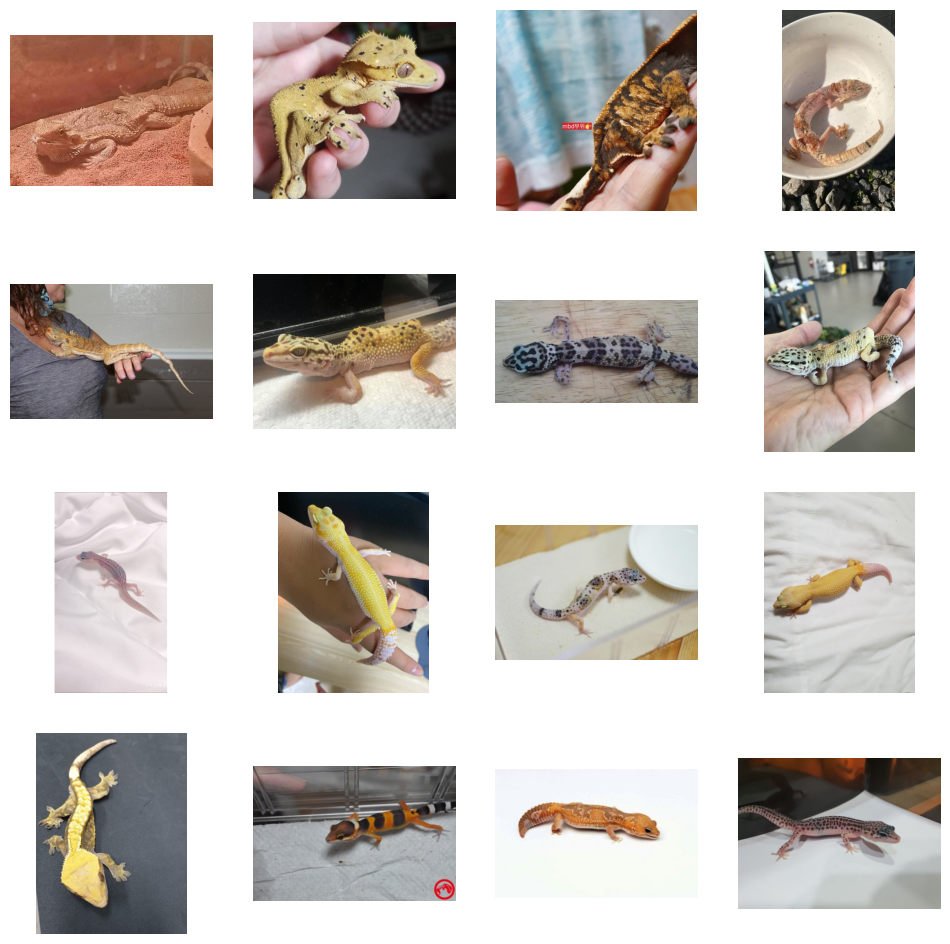

In [30]:
# 이미지 확인
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_mbd_pix = [os.path.join(train_mbd_dir, fname) for fname in train_mbd_fnames[pic_index-8:pic_index]]
next_normal_pix = [os.path.join(train_normal_dir, fname) for fname in train_normal_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_mbd_pix+next_normal_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [31]:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
                                   rotation_range=20, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   width_shift_range=0.2, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
                                   height_shift_range=0.2, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=True, # 좌우로 뒤집기                                   
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  ) 
# validation 및 test 이미지는 augmentation을 적용하지 않는다;
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255) 

In [32]:
# flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만들기
# 변환된 이미지 데이터 생성
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=16, # 한번에 변환된 이미지 16개씩 만들어라 라는 것
                                                    color_mode='grayscale', # 흑백 이미지 처리
                                                    class_mode='binary', 
                                                    target_size=(150,150)) # target_size에 맞춰서 이미지의 크기가 조절된다
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              batch_size=4, 
                                                              color_mode='grayscale',
                                                              class_mode='binary', 
                                                              target_size=(150,150))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='grayscale',
                                                  class_mode='binary',
                                                  target_size=(150,150))
# 참고로, generator 생성시 batch_size x steps_per_epoch (model fit에서) <= 훈련 샘플 수 보다 작거나 같아야 한다.

Found 447 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


In [33]:
# class 확인
train_generator.class_indices

{'MBD': 0, 'normal': 1}

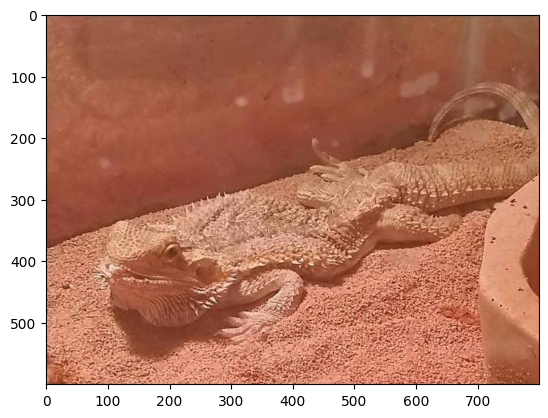

In [34]:
# 이미지 하나 불러오기
sample_img = mpimg.imread(next_mbd_pix[0])
plt.imshow(sample_img)
plt.show()

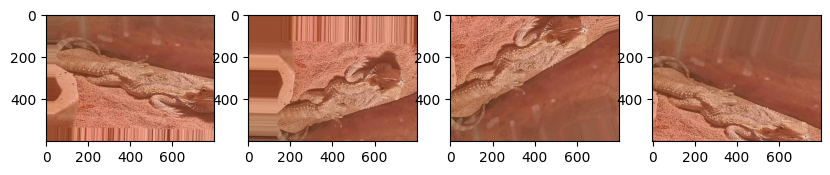

In [35]:
max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]
# 축을 하나 추가했는데, 하나의 이미지만 바꿔주는게 아니라 동시에 여러개의 이미지를 바꿔줄 수 있기에,
# 그림 개수/장수 까지 받아서 4차원으로 (개수/장수, h, w, channel) 이렇게 받는다
# 쉽게 말해, 받는 형식이 4차원이라서 4차원 형태로 만들어 준것

plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)#1행의 max_iter 열의 cnt 서브플롯
    plt.imshow(image.array_to_img(img[0]))#배열을 이미지로 변환하고 img가 4차원 배열이므로 3차원 이미지를 플랏하기 위해 첫번째 이미지 선택해서 플롯
    if cnt == max_iter:
        break
    cnt += 1

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),  # 드롭아웃 층 추가
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),  # 드롭아웃 층 추가
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # 드롭아웃 층 추가
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [37]:
from tensorflow.keras.optimizers import Adam

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=Adam(learning_rate=0.0001), # 옵티마이저로는 RMSprop 사용
              loss='binary_crossentropy', # 손실 함수로 ‘binary_crossentropy’ 사용
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다.

In [38]:
history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=100, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)
# 참고: validation_steps는 보통 내가 원하는 이미지 수에 flow할 때 지정한 batchsize로 나눈 값을 validation_steps로 지정

<ipython-input-38-7fe71a810a9b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다


Epoch 1/100
4/4 - 27s - loss: 0.8039 - accuracy: 0.6406 - val_loss: 0.5880 - val_accuracy: 0.8125 - 27s/epoch - 7s/step
Epoch 2/100
4/4 - 14s - loss: 0.5853 - accuracy: 0.7031 - val_loss: 0.6198 - val_accuracy: 0.6250 - 14s/epoch - 3s/step
Epoch 3/100
4/4 - 10s - loss: 0.6710 - accuracy: 0.7344 - val_loss: 0.6659 - val_accuracy: 0.6250 - 10s/epoch - 3s/step
Epoch 4/100
4/4 - 9s - loss: 0.6656 - accuracy: 0.6562 - val_loss: 0.6859 - val_accuracy: 0.6250 - 9s/epoch - 2s/step
Epoch 5/100
4/4 - 8s - loss: 0.7203 - accuracy: 0.6406 - val_loss: 0.6214 - val_accuracy: 0.6875 - 8s/epoch - 2s/step
Epoch 6/100
4/4 - 6s - loss: 0.7278 - accuracy: 0.6667 - val_loss: 0.6486 - val_accuracy: 0.5625 - 6s/epoch - 2s/step
Epoch 7/100
4/4 - 5s - loss: 0.7819 - accuracy: 0.6094 - val_loss: 0.5494 - val_accuracy: 0.8750 - 5s/epoch - 1s/step
Epoch 8/100
4/4 - 5s - loss: 0.7074 - accuracy: 0.5625 - val_loss: 0.6652 - val_accuracy: 0.6250 - 5s/epoch - 1s/step
Epoch 9/100
4/4 - 6s - loss: 0.6868 - accuracy: 0.

In [39]:
# 모델 성능 평가
model.evaluate(train_generator)


28/28 [==============================] - 6s 203ms/step - loss: 0.6155 - accuracy: 0.7069


[0.615525484085083, 0.7069351077079773]

In [40]:
model.evaluate(validation_generator)

25/25 [==============================] - 2s 64ms/step - loss: 0.6279 - accuracy: 0.6837


[0.6279067397117615, 0.6836734414100647]

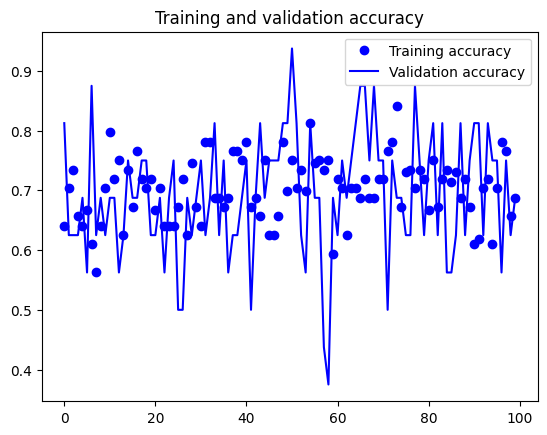

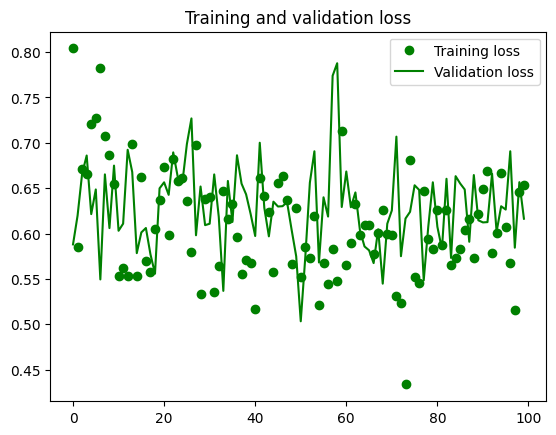

In [41]:
# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:
# 이제 테스트 이미지 분류
import numpy as np
from tensorflow.keras.utils import load_img

# 테스트용 mbd 이미지 경로 설정
test_dir = '/content/drive/MyDrive/project_data/test'
test_mbd_dir = os.path.join(test_dir,'MBD/')
test_mbd_filenames = os.listdir(test_mbd_dir)
test_mbd_filenames

# 테스트용 normal 이미지 경로 설정
test_dir = '/content/drive/MyDrive/project_data/test'
test_normal_dir = os.path.join(test_dir,'normal/')
print(test_normal_dir)
test_normal_filenames = os.listdir(test_normal_dir)
test_normal_filenames

# mbd, normal을 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_mn_filenames = {}
dic_mn_filenames['MBD'] = test_mbd_filenames
dic_mn_filenames['normal'] = test_normal_filenames


/content/drive/MyDrive/project_data/test/normal/


1/1 [==============================] - 0s 17ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4468 (\N{HANGUL JUNGSEONG YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4359 (\N{HANGUL CHOSEONG PIEUP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

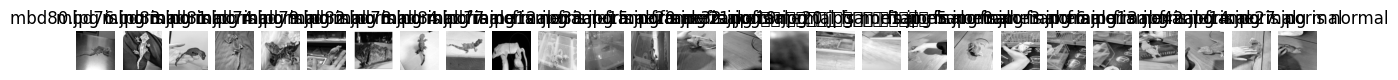

1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4357 (\N{HANGUL CHOSEONG RIEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4467 (\N{HANGUL JUNGSEONG EU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


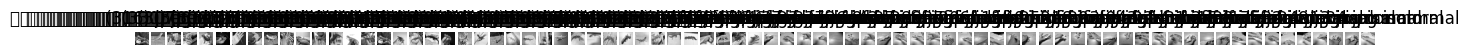

In [43]:
# MBD 분류 테스트
for mn, filenames in dic_mn_filenames.items():
    fig = plt.figure(figsize=(16,10))
    rows, cols = 1, len(filenames)  # 서브플롯 개수를 파일명 리스트의 길이로 설정
    for i, fn in enumerate(filenames):
        path = os.path.join(test_dir, mn, fn) 
        test_img = image.load_img(path, color_mode='grayscale', target_size=(150, 150), interpolation='bilinear')     
        x = image.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        ax = fig.add_subplot(rows, cols, i+1)  # ax 변수를 추가하여 서브플롯을 가져옴
        if classes[0]==0:
            ax.set_title(fn + " is MBD")  # set_title() 함수로 서브플롯의 제목 설정
            ax.axis('off')
            ax.imshow(test_img, cmap='gray')  # ax.imshow() 함수로 이미지 플롯
        else:
            ax.set_title(fn + " is normal")  # set_title() 함수로 서브플롯의 제목 설정
            ax.axis('off')
            ax.imshow(test_img, cmap='gray')  # ax.imshow() 함수로 이미지 플롯
    plt.show()

In [44]:
# 모델 성능 평가
model.evaluate(test_generator)

26/26 [==============================] - 1s 47ms/step - loss: 0.5898 - accuracy: 0.7624


[0.5898089408874512, 0.7623762488365173]